In [106]:
import numpy as np

import matplotlib.pyplot as plt

In [107]:
def cosd(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [108]:
def calc_perpendicular_distance(N, ref_dirs):
    u = np.tile(ref_dirs, (len(N), 1))
    v = np.repeat(N, len(ref_dirs), axis=0)

    norm_u = np.linalg.norm(u, axis=1)
    #print("norm_u", norm_u)

    scalar_proj = np.sum(v * u, axis=1) / norm_u
    #print("scalar_proj", scalar_proj)
    proj = scalar_proj[:, None] * u / norm_u[:, None]
    #print("proj", proj)
    val = np.linalg.norm(proj - v, axis=1)
    #print("val", val)
    matrix = np.reshape(val, (len(N), len(ref_dirs)))

    return matrix

In [109]:
niches = np.array([
    [0,1],
    [1,0]
])
niches

array([[0, 1],
       [1, 0]])

In [165]:
niches = np.array([
    [0.3,0.8],
    [0.5,0.1]
])
niches

array([[0.3, 0.8],
       [0.5, 0.1]])

In [159]:
N = np.random.random(size=(20,2))
N

array([[0.36666738, 0.28451164],
       [0.73669418, 0.73385952],
       [0.0709134 , 0.52345743],
       [0.73900485, 0.07549662],
       [0.91083183, 0.32705441],
       [0.89189681, 0.3171705 ],
       [0.48349732, 0.44694406],
       [0.92497654, 0.93784211],
       [0.98964626, 0.14968975],
       [0.19470512, 0.4772333 ],
       [0.26646787, 0.49373284],
       [0.08151933, 0.84697233],
       [0.29831519, 0.05786213],
       [0.30964471, 0.05458284],
       [0.44427686, 0.51831521],
       [0.5693509 , 0.58799544],
       [0.62749574, 0.30418356],
       [0.18335917, 0.41083945],
       [0.63119184, 0.58241403],
       [0.56549044, 0.9830076 ]])

In [166]:
map_cosd=[]
for ref in niches:   
    dmin,v,pos=1,[],0 
    for i in range(len(N)):
        d=1-cosd(np.array(ref),np.array(N[i]))
        print(d)
        if d<dmin:
            dmin=d
            #v=F[i]
            sol = N[i]
            pos=i
    map_cosd.append([ref,sol,pos])

0.14859021184738896
0.09043286524367966
0.02500976211631356
0.5555346611539405
0.35310575230808505
0.3554477119161751
0.10657934070279085
0.08679736888126988
0.5127930493146664
0.0004090172559662042
0.009251482967491897
0.03433839046646692
0.47701032982828273
0.4916618713067201
0.060580331670474385
0.08308624138850917
0.2756090850922156
0.0018602376842214996
0.10698629440880325
0.013297856112670647
0.10506065975708534
0.16688200490863703
0.6740210879668664
0.004565142547800716
0.010834686683019235
0.010389069172589083
0.1468159286499796
0.1718004990832266
0.00111738044584353
0.4479936303875538
0.36169300303403207
0.7108412555023191
1.6886323095155475e-05
0.0002624764642176203
0.2129394982323466
0.17699256398879448
0.03208098269763793
0.42126930621665204
0.14634417148268652
0.3410444068700711


In [167]:
map_cosd

[[array([0.3, 0.8]), array([0.19470512, 0.4772333 ]), 9],
 [array([0.5, 0.1]), array([0.29831519, 0.05786213]), 12]]

In [168]:
dist_matrix = calc_perpendicular_distance(N, niches)
print(dist_matrix)
niche_of_individuals = np.argmin(dist_matrix, axis=1)
#print(niche_of_individuals)
dist_to_niche = dist_matrix[np.arange(N.shape[0]), niche_of_individuals]
print(dist_to_niche)
closest = dist_matrix[:, np.unique(niche_of_individuals)].argmin(axis=0)
dists = dist_matrix[closest,np.unique(niche_of_individuals)]
print(closest)
perpen = list(zip(niches[np.unique(niche_of_individuals)],N[closest],closest,dists))

[[0.24342266 0.20707723]
 [0.43211298 0.57513085]
 [0.11739989 0.49938498]
 [0.66544317 0.07090025]
 [0.73800195 0.14207441]
 [0.72374301 0.13609591]
 [0.29578012 0.34344308]
 [0.53678417 0.73822702]
 [0.87407509 0.04730272]
 [0.01474028 0.42978093]
 [0.07614047 0.43188623]
 [0.22106291 0.81453744]
 [0.25900447 0.00176594]
 [0.27076406 0.00720344]
 [0.23399677 0.42112001]
 [0.32664088 0.46491807]
 [0.48073659 0.17521448]
 [0.02742917 0.36690153]
 [0.38650412 0.44731704]
 [0.18432819 0.85301646]]
[0.20707723 0.43211298 0.11739989 0.07090025 0.14207441 0.13609591
 0.29578012 0.53678417 0.04730272 0.01474028 0.07614047 0.22106291
 0.00176594 0.00720344 0.23399677 0.32664088 0.17521448 0.02742917
 0.38650412 0.18432819]
[ 9 12]


In [169]:
perpen

[(array([0.3, 0.8]), array([0.19470512, 0.4772333 ]), 9, 0.014740284872290559),
 (array([0.5, 0.1]),
  array([0.29831519, 0.05786213]),
  12,
  0.001765938585516706)]

Text(0.5, 1.0, 'Cosine distance')

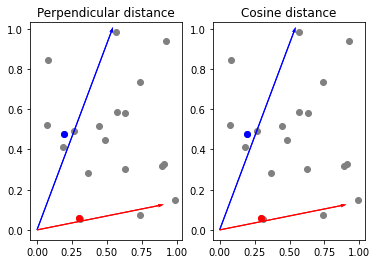

In [170]:
#fig = plt.figure(figsize=(4,4))

scale = 0.6

ax = plt.subplot(1,2,1)

x, y = np.zeros((2,niches.shape[1]))
u, v = niches
#ax.quiver(x,y,u,v,color="blue", label="Ref dirs", zorder=0)
ax.scatter(N[:,0], N[:,1], color="grey", label="Solutions")
colors = ["blue", "red", "green"]
i = 0
for ref,sol,idx,d in perpen:
    ax.scatter(sol[0],sol[1],color=colors[i])
    x, y = np.zeros((2,niches.shape[1]))
    u, v = ref
    ax.quiver(x,y,u,v,color=colors[i], label="Ref dirs", scale=scale)
    i += 1
ax.set_title("Perpendicular distance")
    
ax = plt.subplot(1,2,2)

x, y = np.zeros((2,niches.shape[1]))
u, v = niches
#ax.quiver(x,y,u,v,color="blue", label="Ref dirs", zorder=0)
ax.scatter(N[:,0], N[:,1], color="grey", label="Solutions")
colors = ["blue", "red", "green"]
i = 0
for ref,sol,idx in map_cosd:
    ax.scatter(sol[0],sol[1],color=colors[i])
    x, y = np.zeros((2,niches.shape[1]))
    u, v = ref
    ax.quiver(x,y,u,v,color=colors[i], label="Ref dirs", scale=scale)
    i += 1
ax.set_title("Cosine distance")